In [ ]:
#Importing the required libraries.
import pandas as pd #for dataframes and reading csv files.
import numpy as np # for math operations(sqrt)
import matplotlib.pyplot as plt #for plotting the graphs
import IPython
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import csv


%config InlineBackend.figure_format = 'retina'

# Point 1: Data Preparation (Milocco)

The csv files are originated from different sources, hence
resulting in differences in the encoding and end-of-lines that have to be taken
into account in the data preparation phase. Make sure each .csv file is properly
interpreted: Difference in the encoding and end-of-lines; -cvs file properly interpreted

In [ ]:
from os import listdir
from os.path import isfile, join
files_indir = ["data/"+f for f in listdir("data") if isfile(join("data", f))]
print(files_indir)

['data/day_od.csv', 'data/abitanti2.txt', 'data/Veneto.txt', 'data/codici_istat_comune.csv', 'data/distinct_users_day.csv', 'data/codici_istat_provincia.csv', 'data/codici_nazioni.csv']


In [ ]:
!cd data; head -n 5 *

==> abitanti2.txt <==
Torino	2269120
Vercelli	172307
Novara	369595
Cuneo	588559
Asti	215884

==> codici_istat_comune.csv <==
COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
1,1001,Agli�,0
1,1002,Airasca,0
1,1003,Ala di Stura,0
1,1004,Albiano d'Ivrea,0

==> codici_istat_provincia.csv <==
COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
1,1,Torino,TO
1,2,Vercelli,VC
1,3,Novara,NO
1,4,Cuneo,CN

==> codici_nazioni.csv <==
 
 
 
 
 

==> day_od.csv <==
��M O N T H , D O W , O R I G I N , D E S T I N A T I O N , C U S T _ C L A S S , C O D _ C O U N T R Y , C O D _ P R O , P R O _ C O M , F L O W 
 M a r z o , D o m e n i c a , 1 0 8 , 3 0 0 , v i s i t o r , 2 2 2 , 2 8 , - 9 9 9 , 4 9 3 
 M a g g i o , L u n e d � , 3 0 0 , 1 0 1 , v i s i t o r , 2 2 2 , 9 3 , - 9 9 9 , 5 8 
 F e b b r a i o , S a b a t o , 1 0 8 , 2 0 7 , v i s i t o r , 2 2 2 , 2 8 , - 9 9 9 , 3 9 
 A p r i l e , V e n e r d � , 1 0 9 , 1 2 1 , r e s i d e n t , 2 2 2 , 2 8 , 2 8 0 6 0 , 1 0 6 

==> distinct_users_day.csv <==
DOW,CUST_CLAS

In [ ]:
#dataframe from day_od.csv: "day origin and destination"

#name=None explicetely since adding column after that; utf for byte 0xfe at the start; quoting=2 "Non-numerical"
#don't used usecols since we want a specific ordering + "Int64" handels with NaN values
#drop Origin and Destination since we don't have a specific labelling of Origin and Destination

file_name="data/day_od.csv"
day_od=pd.read_csv(file_name,sep=",",encoding='utf-16', 
names=["MONTH","DOW","ORIGIN","DESTINATION","CUST_CLASS","COD_COUNTRY","COD_PRO","PRO_COM","FLOW"], 
header=0, quoting=2, quotechar='"') #comment: explicit header=0 to replace column names;  

#************PREVIOUSLY THERE WAS THIS CONVERSION. THINK IT'S NOT USEFUL
#day_od=pd.DataFrame(read_day_od)#dataFrame of the file(can be read more easily than csv)


day_od[ ["COD_COUNTRY","COD_PRO","PRO_COM"] ]=day_od[ ["COD_COUNTRY","COD_PRO","PRO_COM"] ].astype("Int64") #Int64 handles NaN
day_od.drop(["ORIGIN","DESTINATION"], axis=1) 

,MONTH,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,visitor,222,28,-999,493.0
1,Maggio,Lunedì,visitor,222,93,-999,58.0
2,Febbraio,Sabato,visitor,222,28,-999,39.0
3,Aprile,Venerdì,resident,222,28,28060,106.0
4,Maggio,Giovedì,visitor,222,28,28103,136.0
...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,Altro,-999,-999,-999,32.0
193497,Marzo,Giovedì,Altro,-999,-999,-999,32.0
193498,Febbraio,Giovedì,Altro,-999,-999,-999,40.0
193499,Aprile,Domenica,visitor,222,28,28086,36.0


In [ ]:
#Read distinct_users_day.csv
file_name="data/distinct_users_day.csv"
dist_users_day=pd.read_csv(file_name,sep=",",encoding="latin-1")
#dist_users_day=pd.DataFrame(read_users_day)

dist_users_day[["COD_COUNTRY","COD_PRO","PRO_COM"]]=dist_users_day[ ["COD_COUNTRY","COD_PRO","PRO_COM"] ].astype("Int64") #Int64 handles NaN

#sorting...
dist_users_day[dist_users_day["CUST_CLASS"]=="visitor"].groupby("COD_PRO", as_index=False).sum().sort_values("VISITORS", ascending=False)

dist_users_day

,DOW,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,VISITORS
0,Mercoledì,visitor,222,35,35033,968
1,Lunedì,visitor,222,22,22098,64
2,Domenica,visitor,222,52,52032,516
3,Giovedì,visitor,222,108,108009,128
4,Giovedì,visitor,222,29,29048,512
...,...,...,...,...,...,...
12840,Mercoledì,foreigner,259,<NA>,<NA>,176
12841,Sabato,foreigner,602,<NA>,<NA>,164
12842,Giovedì,foreigner,732,<NA>,<NA>,80
12843,Giovedì,foreigner,297,<NA>,<NA>,80


In [ ]:
# Getting DataFrame for codici_istat_comune.csv
file_name="data/codici_istat_comune.csv"
codist_com=pd.read_csv(file_name,sep=",",delimiter=',',header=0,encoding="latin-1")
#codist_com=pd.DataFrame(data_cic)
codist_com

,COD_PRO,PRO_COM,COMUNE,COMUNE_CAPOLUOGO
0,1,1001,Agliè,0
1,1,1002,Airasca,0
2,1,1003,Ala di Stura,0
3,1,1004,Albiano d'Ivrea,0
4,1,1005,Alice Superiore,0
...,...,...,...,...
7950,111,111104,Villasalto,0
7951,111,111105,Villasimius,0
7952,111,111106,Villasor,0
7953,111,111107,Villaspeciosa,0


In [ ]:
# Getting DataFrame for codici_istat_provincia.csv
file_name="data/codici_istat_provincia.csv"
codist_prov=pd.read_csv(file_name,sep=",",encoding="latin-1",header=0)
#codist_prov=pd.DataFrame(data_cip)
codist_prov.head(20)

,COD_REG,COD_PRO,PROVINCIA,PROV_SIGLA
0,1,1,Torino,TO
1,1,2,Vercelli,VC
2,1,3,Novara,NO
3,1,4,Cuneo,CN
4,1,5,Asti,AT
5,1,6,Alessandria,AL
6,1,96,Biella,BI
7,1,103,Verbano-Cusio-Ossola,VB
8,2,7,Valle d'Aosta/Vallée d'Aoste,AO
9,3,12,Varese,VA


In [ ]:
# Getting DataFrame for codici_nazioni.csv
#utf16 since there's byte 0xfe at the start, " as quoting, escapechar="\r" since endline=\n
import csv
file_name="data/codici_nazioni.csv"
codist_naz=pd.read_csv(file_name,delimiter=',',header=0,quoting=2, #quoting=2 "Non-Numerical value ex. "Colombia";
                                error_bad_lines=True,encoding="utf16",quotechar = '"',escapechar='\r')

#codist_naz=pd.DataFrame(data_cin)

codist_naz[ ["COD_COUNTRY"] ]=codist_naz[ ["COD_COUNTRY"] ].astype("Int64") #Int64 handles NaN

value=658
def color658(val):
    color = 'red' if val == value else 'white'
    return 'background-color: %s' % color
s = codist_naz[107:110].style.applymap(color658) #applymap element wise but apply along all axis
s

#index_series=codist_naz[codist_naz.COD_COUNTRY==658].index
#index_series[0]

,COD_COUNTRY,COUNTRY_NAME_IT
107,650,Malawi
108,658,"Isola di Sant'Elena, Ascension e Tristan de Cugna"
109,732,Colombia


Via
```bash
cat Veneto.txt | tr ',' '.' > Veneto_fixed.txt
```
there's the straightfoward handling of the decimal, ready to be converted in Int

In [ ]:
#Getting DataFrame for veneto.txt
url='https://www.dropbox.com/s/joockt9l4az3euk/Veneto_fixed.txt?dl=1'
url="data/Veneto.txt"
codist_ven=pd.read_csv(url,delimiter=';',decimal=",",header=0,quoting=2,quotechar = '"',encoding="utf8",error_bad_lines=True)
#codist_ven=pd.DataFrame(data_veneto)

codist_ven[ ["Origine","Destinazione"] ]=codist_ven[ ["Origine","Destinazione"] ].astype("Int64")

In [ ]:
codist_ven

,Name,Origine,Destinazione,Total_Minu,Total_Mete
0,1042 - 23059,1042,23059,129.69,243790.98
1,1042 - 23022,1042,23022,131.86,246794.26
2,1042 - 23082,1042,23082,133.84,253806.62
3,1042 - 23083,1042,23083,136.44,252084.96
4,1042 - 23043,1042,23043,136.47,251192.38
...,...,...,...,...,...
4241295,62067 - 25015,62067,25015,482.12,884264.20
4241296,62067 - 25014,62067,25014,482.59,875876.53
4241297,62067 - 25052,62067,25052,484.98,888212.30
4241298,62067 - 25044,62067,25044,485.53,883640.08


# Point 2: Ranking (Ziliotto)

## Ranking of visitors from foreign countries

based on the number of total of fereign visitors per each country, create a ranked plot of the first 20 countries with
the most visitors

In [ ]:
#displaying dataframes
def display_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [ ]:
#Cleaning data and groupbying
visitors = dist_users_day[dist_users_day['CUST_CLASS'] == 'foreigner'
                         ].merge(codist_naz,on='COD_COUNTRY'
                         ).sort_values(by=['VISITORS'],ascending=False,ignore_index=True
                         ).drop(columns=['COD_PRO','PRO_COM','CUST_CLASS'],axis=1
                         ).dropna(axis='rows')
        
visitors1 = visitors.groupby(['COUNTRY_NAME_IT'],as_index=False
                            ).sum(
                            ).sort_values(by=['VISITORS'],ascending=False,ignore_index=True
                            ).drop(columns=['COD_COUNTRY'],axis=1
                            ).copy()
    
display_side([visitors[:20], visitors1[:20]], ['Cleaning', 'Groupby'])

,DOW,COD_COUNTRY,VISITORS,COUNTRY_NAME_IT
0,Mercoledì,208,20312,Francia
1,Domenica,228,20264,Svizzera
2,Lunedì,208,19696,Francia
3,Sabato,228,18260,Svizzera
4,Giovedì,208,18164,Francia
5,Domenica,208,18064,Francia
6,Martedì,208,18000,Francia
7,Lunedì,228,17984,Svizzera
8,Sabato,208,17928,Francia
9,Venerdì,208,17508,Francia


In [ ]:
fig = go.Figure()

config = {'displayModeBar': True}

df = visitors1[0:20]
fig = px.pie(df, values='VISITORS', names='COUNTRY_NAME_IT', title='Ranking of foreigner visitors weekly'
             ,hole=.25,color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside',hoverinfo='percent+value', textinfo='percent+label+value', textfont_size=12,
                  marker=dict( line=dict(color='#000000', width=1.5)))
fig.update_layout(template='plotly_white') #if needed, go "plotly_black"
fig.show(config=config)

#Point 3: Rank Italian visitors

##Ranking of Italian visitors by province weighted by the number of inhabitants

Based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.

In [ ]:
day_od.columns = map(str.upper, day_od.columns)#preprocessing

day_od1 = day_od[(day_od['COD_COUNTRY'] == 222) & (day_od['CUST_CLASS'] == 'visitor') & (day_od['COD_PRO'] != -999.0)
                ].merge(codist_prov,how='left',on='COD_PRO'
                ).drop(columns=['COD_REG','PROV_SIGLA','COD_COUNTRY','PRO_COM','ORIGIN','DESTINATION']
                ).dropna(axis='rows'       
                ).sort_values(by=['FLOW','PROVINCIA'],ascending=False, na_position='last',ignore_index=True
                ).copy()

day_od2 = day_od1.groupby(['PROVINCIA','MONTH','DOW'],as_index=False
                        ).sum(
                        ).sort_values(by='FLOW',ascending=False,ignore_index=True
                        ).drop(columns=['COD_PRO']
                        )

IPython.display.display(day_od1,day_od2)

,MONTH,DOW,CUST_CLASS,COD_PRO,FLOW,PROVINCIA
0,Aprile,Sabato,visitor,28,1330.0,Padova
1,Marzo,Venerdì,visitor,28,1282.0,Padova
2,Maggio,Sabato,visitor,28,1278.0,Padova
3,Maggio,Lunedì,visitor,28,1273.0,Padova
4,Marzo,Venerdì,visitor,28,1249.0,Padova
...,...,...,...,...,...,...
123870,Aprile,Martedì,visitor,6,32.0,Alessandria
123871,Aprile,Sabato,visitor,6,32.0,Alessandria
123872,Marzo,Giovedì,visitor,6,32.0,Alessandria
123873,Febbraio,Mercoledì,visitor,6,32.0,Alessandria


,PROVINCIA,MONTH,DOW,FLOW
0,Padova,Maggio,Mercoledì,264919.0
1,Padova,Maggio,Venerdì,262395.0
2,Padova,Marzo,Mercoledì,261928.0
3,Padova,Aprile,Venerdì,257970.0
4,Padova,Maggio,Giovedì,257412.0
...,...,...,...,...
1419,Messina,Marzo,Martedì,32.0
1420,Messina,Marzo,Venerdì,32.0
1421,Como,Aprile,Venerdì,32.0
1422,Teramo,Marzo,Giovedì,32.0


In [ ]:
filename="data/abitanti2.txt"
abitanti = pd.read_csv(filename, header=None,quoting=2,encoding="latin-1")
abitanti = pd.DataFrame(abitanti[0].str.split('\t' ,n=1).tolist())
abitanti.columns = ["PROVINCIA", "VALUE"]
abitanti['VALUE'] = abitanti['VALUE'].apply(pd.to_numeric).sort_values(ascending=False)


abitanti

,PROVINCIA,VALUE
0,Torino,2269120.0
1,Vercelli,172307.0
2,Novara,369595.0
3,Cuneo,588559.0
4,Asti,215884.0
...,...,...
101,Siracusa,400881.0
102,Sassari,492642.0
103,Nuoro,210531.0
104,Cagliari,431955.0


In [ ]:
day_od3 = day_od2.merge(abitanti,on='PROVINCIA')
day_od3['RATIO'] = 4*day_od3['FLOW']/day_od3['VALUE']
day_od3.sort_values(by=['RATIO','PROVINCIA'],ascending=False)

,PROVINCIA,MONTH,DOW,FLOW,VALUE,RATIO
0,Padova,Maggio,Mercoledì,264919.0,936740.0,1.131238
1,Padova,Maggio,Venerdì,262395.0,936740.0,1.120460
2,Padova,Marzo,Mercoledì,261928.0,936740.0,1.118466
3,Padova,Aprile,Venerdì,257970.0,936740.0,1.101565
4,Padova,Maggio,Giovedì,257412.0,936740.0,1.099182
...,...,...,...,...,...,...
1315,Palermo,Aprile,Lunedì,36.0,1260193.0,0.000114
1316,Palermo,Febbraio,Mercoledì,36.0,1260193.0,0.000114
1317,Palermo,Aprile,Mercoledì,32.0,1260193.0,0.000102
1318,Palermo,Febbraio,Lunedì,32.0,1260193.0,0.000102


In [ ]:
fig = go.Figure()

config = dict({'scrollZoom': True})
config = {'displayModeBar': True}


data = day_od3.reindex(index=day_od3.index[::-1])
fig = px.bar(data[800::], x="RATIO", y="PROVINCIA", color='MONTH', barmode='stack',text='DOW'
             ,title="Ranking of provinces with most visitors montly"
             ,category_orders={'MONTH':['Febbraio','Marzo','Aprile','Maggio']
                               
            #DA RIFARE
             ,'DAY':['Domenica', 'Sabato', 'Venerdì','Giovedì','Mercoledì','Martedì','Lunedì']
             , 'PROVINCIA':['Padova','Venezia','Rovigo','Vicenza','Treviso','Belluno','Verona'
                            ,'Trento','Ferrara','Udine','Mantova','Bologna','Milano','Brescia',
                            'Roma','Firenze','Torino','Ascoli Piceno','Napoli','Bergamo']}
             
             ,orientation='h'
             ,labels={
                     "RATIO": "Flow",
                     "PROVINCIA": "",
                     
                 })


fig.update_traces(texttemplate='%{text:.4s}', textposition='none')
fig.update_layout(uniformtext_minsize=5, template='plotly_dark',uniformtext_mode='hide')
fig.update_xaxes(type='log')
fig.show(config=config)

#fig.add_annotation(x=-2, y=2,            text="Anomaly",            showarrow=True,            arrowhead=1)


# Michele's Part

In [ ]:
import pandas as pd
import numpy as np

Reading Data

In [ ]:
path="data/distinct_users_day.csv"
dud=pd.read_csv(path,sep=",",encoding="latin-1")
dud=dud[dud['CUST_CLASS']=='visitor'] #keep only visitors
dud=dud[['COD_PRO','VISITORS']].reset_index(drop=True) #keep relevant columns

path="data/codici_istat_provincia.csv"
cod_prov=pd.read_csv(path,sep=",",encoding="latin-1")
cod_prov=cod_prov[['COD_PRO','PROVINCIA']].reset_index(drop=True) #same as before
cod_prov=cod_prov[cod_prov.COD_PRO!=-999]                         #removing the ones without a province classified

url='https://www.dropbox.com/s/joockt9l4az3euk/Veneto_fixed.txt?dl=1'
#url="data/Veneto_fixed.txt"
distances=pd.read_csv(url,sep=";")
distances=distances[['Origine','Destinazione','Total_Mete']]

path="data/codici_istat_comune.csv"
cod_com=pd.read_csv(path,sep=",",encoding="latin-1")

#cod_com.replace(-999,np.nan, inplace=True)
#cod_com.dropna()

distances

,Origine,Destinazione,Total_Mete
0,1042.0,23059.0,243790.98
1,1042.0,23022.0,246794.26
2,1042.0,23082.0,253806.62
3,1042.0,23083.0,252084.96
4,1042.0,23043.0,251192.38
...,...,...,...
4241295,62067.0,25015.0,884264.20
4241296,62067.0,25014.0,875876.53
4241297,62067.0,25052.0,888212.30
4241298,62067.0,25044.0,883640.08


```bash
cat Veneto.txt | tr ',' '.' > Veneto_fixed.txt
```

We used this bash command to replace commas to points in order to avoid conversion problems

In the next two blocks we replace the COD_COM with the COD_PRO in the distances matrix.
The problem here is that `codici_istat_comune` does not have all the COMUNI. We avoid this problem by replacing the 
missing COD_COM with the next known COD_COM.

dic={}
for index, row in cod_com.iterrows():
    dic[row.PRO_COM]=row.COD_PRO

def com_to_prov(comune):
    try:
        p=dic[comune]
    except:
        p=com_to_prov(comune+1)
    return p
com_to_prov=np.vectorize(com_to_prov)

origine=distances.Origine.astype(int).values
destinazione=distances.Destinazione.astype(int).values


print(origine[:2])
origine=com_to_prov(origine)
print(origine[:2])

destinazione=com_to_prov(destinazione)

In [ ]:
dic={} 
for index, row in cod_com.iterrows(): 
    dic[row.PRO_COM]=row.COD_PRO

def com_to_prov(comune): 
    try: p=dic[comune] 
    except: p=com_to_prov(comune+1) 
    return p 
com_to_prov=np.vectorize(com_to_prov)
origine=distances.Origine.astype(int).values 
destinazione=distances.Destinazione.astype(int).values

print(origine[:2]) 
origine=com_to_prov(origine) 
print(origine[:2])

destinazione=com_to_prov(destinazione)

[1042 1042]
[1 1]


In [ ]:
#sostituisco in "Origine " e "Destinzazion" reinserisco i comuni e destinazione belli

cod_Padova=cod_prov[cod_prov.PROVINCIA=='Padova'].COD_PRO.values[0]
distances['Origine']=origine #provincia d'origine
distances['Destinazione']=destinazione #prov di dest

distances=distances[distances.Destinazione==cod_Padova]
distances=distances.groupby(['Origine','Destinazione'],as_index=False).mean()   #media tra i comuni di quella provincia = centroide della regione
#si può rimuovere destinazione e raggruppi per prov d'origine

dud=dud.groupby(['COD_PRO'],as_index=False).sum() #sum of visitors in prov


Same problem as before: some COD_PRO are missing. In this case we just remove the missing COD_PRO.

Dud: VIs e origine 
DIst: retain dist and origine

In [ ]:
dic={}
for index, row in distances.iterrows():
    dic[row.Origine]=row.Total_Mete

def prov_to_dist(p):
    try: 
        d=dic[p]
    except:
        d=-1
    return d 
prov_to_dist=np.vectorize(prov_to_dist)

dud['DISTANCES']=prov_to_dist(dud.COD_PRO.astype(int))
print(np.sum(dud.VISITORS[dud.DISTANCES==-1]))
dud=dud[dud.DISTANCES!=-1]

35980


### Make the distribution

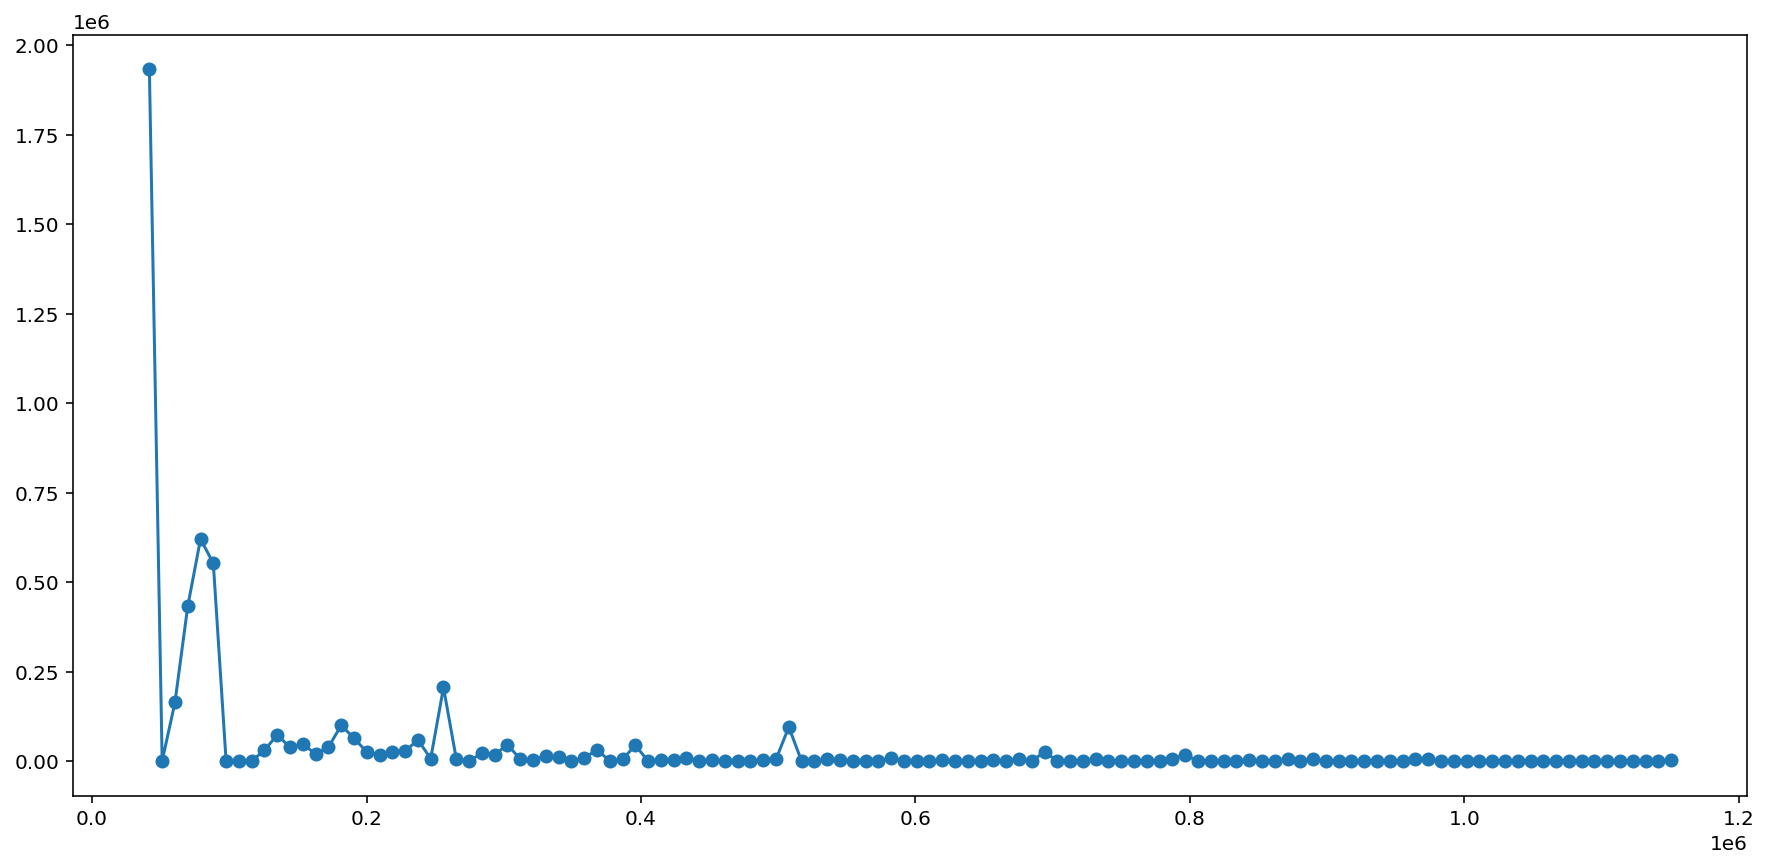

In [ ]:
#numb and freq and i want the histogram. Problem: plotlib needs one a vector of data
def distribution(N,df): #nmb of intervals adn df=data
    dist=df.DISTANCES.values
    freq=df.VISITORS.values #freq=visitors

    bins=np.linspace(np.min(dist),np.max(dist),N+1) #in N parts

    f_bins=[]
    for i in range(len(bins)-1):
      
        f=np.sum(freq[dist<=bins[i+1]])
        f-=np.sum(freq[dist<bins[i]])
        f_bins.append(f)

    bins=(bins[1:]+bins[:-1])*0.5

    return bins, f_bins

nbins=120
bins, f_bins = distribution(nbins,dud)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(bins,f_bins,'-o');

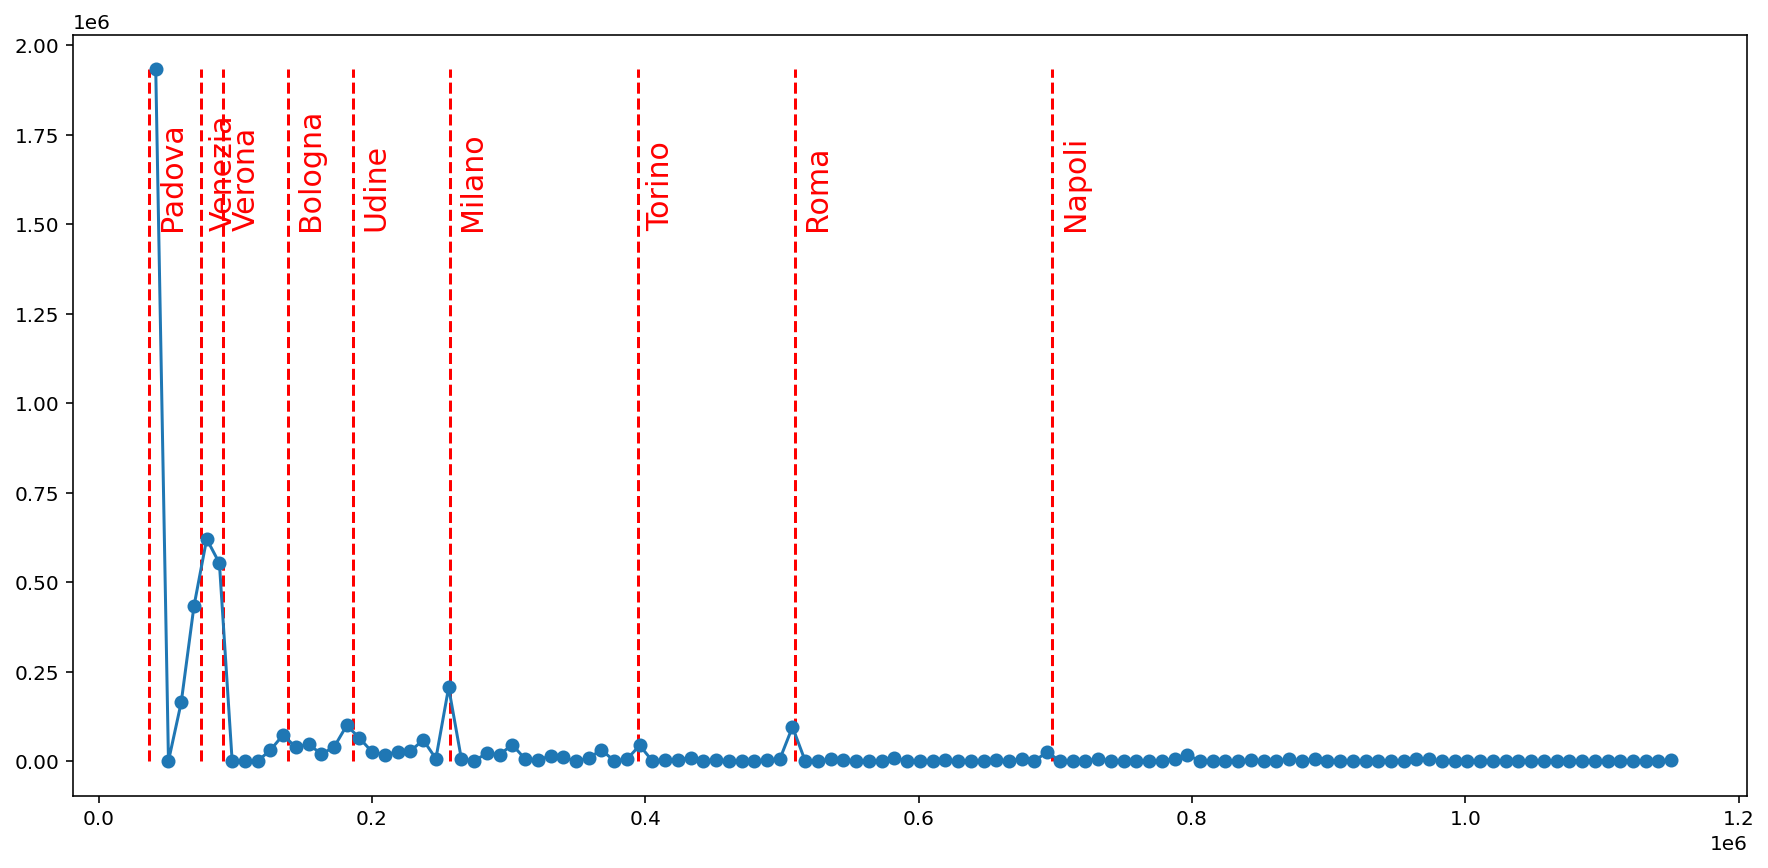

In [ ]:
#pos città is an int
#numb of bins not precise (not int) dependent on the number of bins

big=['Milano','Venezia','Roma','Napoli','Bologna','Torino','Udine','Verona','Padova']
cod_big=[]
for i in big:
    cod_big.append(cod_prov[cod_prov.PROVINCIA==i].COD_PRO.values[0]) #cod prov big

plt.figure(figsize=(15,7))
plt.plot(bins,f_bins,'-o')

for i in range(len(big)):
    plt.vlines(prov_to_dist(cod_big[i]),min(f_bins),max(f_bins),color='r',linestyles='dashed') #discorso sui bins e città big
    plt.text(prov_to_dist(cod_big[i])+6e3,1.5E6,big[i],fontsize=15,color='r',rotation=90)

In [ ]:
dud=dud[dud.COD_PRO!=28] #REMOVING PADOVA

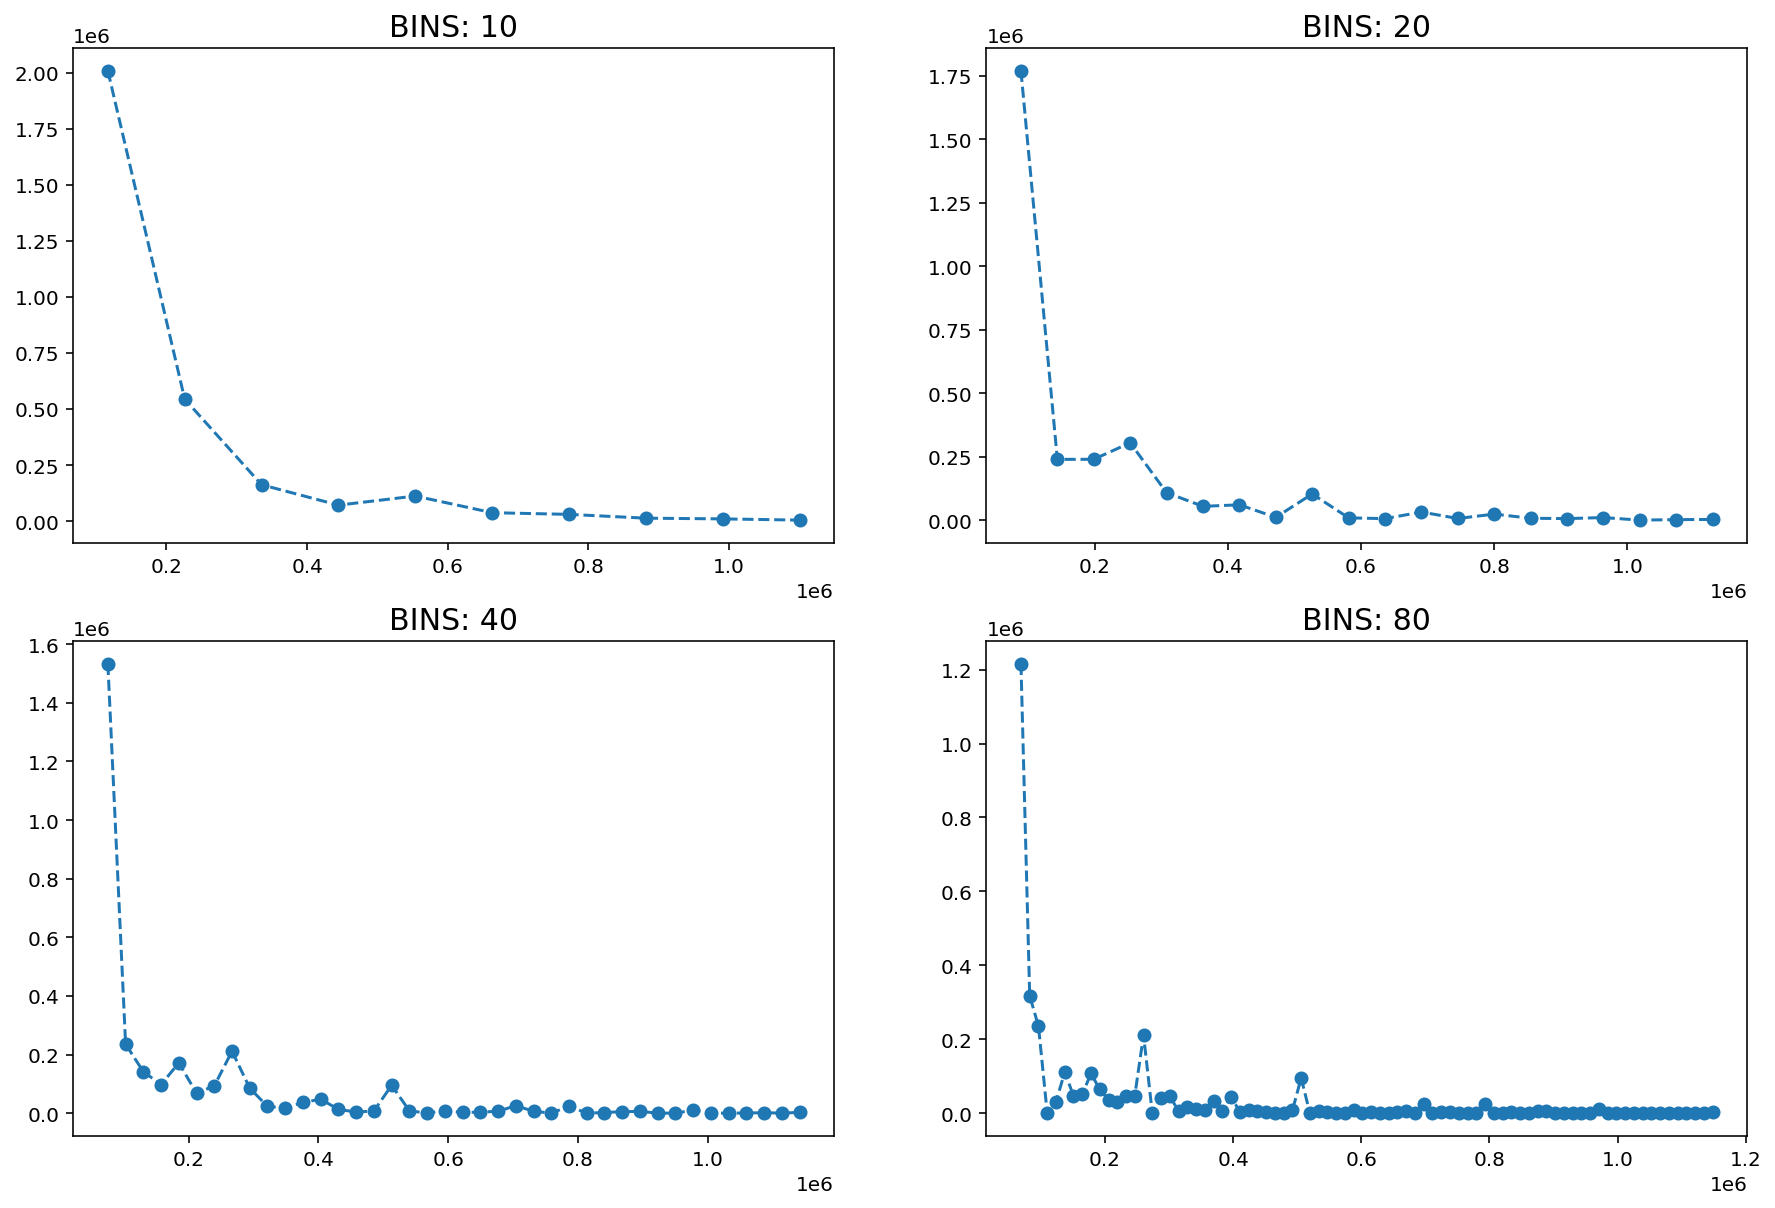

In [ ]:
f, AX = plt.subplots(2,2,figsize=(15,10))
nbins=10
for ax in AX.flatten(): #matrix 2x2
    bins, f_bins = distribution(nbins,dud)

    ax.plot(bins,f_bins,'--o')
    ax.set_title('BINS: '+str(nbins),fontsize=15)
    nbins*=2

If we consider a population equally distributed on the terrirory, we can hypothesize an exponential 
trend in how much the persons more near to Padua are more propensity to visit the city. 
The problem is that the population is more concentrated into the main city and so we 
observe peaks in correspondence of the main cities as we can see in plots with `nbins>10`. To avoid this fluctuations 
we try to do the regression using a small number of bins.

[ 0.02768303 -0.02543816]


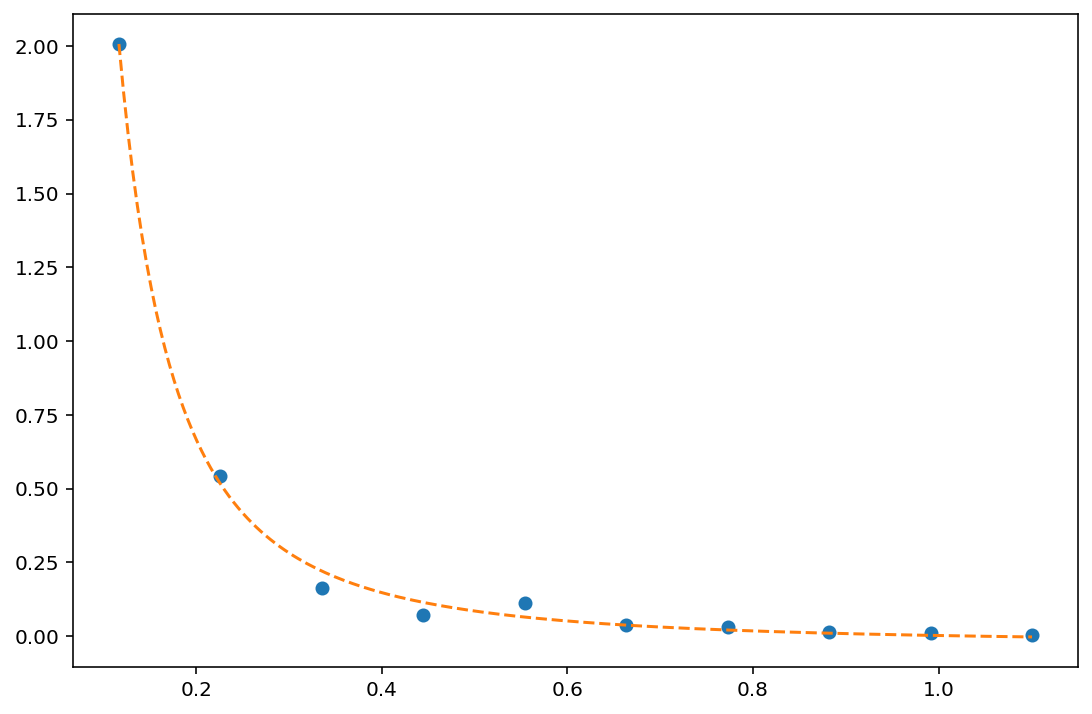

In [ ]:
from scipy import optimize
def f(x,A,B):
    return A/x**2+B

nbins=10
bins, f_bins = distribution(nbins,dud)
bins/=1e6
f_bins=np.array(f_bins)/1e6

max_params, params_covariance = optimize.curve_fit(f, bins, f_bins, p0=[1e6, 1e5])

#plot well the distr
x=np.linspace(np.min(bins),np.max(bins),200)
plt.figure(figsize=(9,6))
plt.plot(bins,f_bins,'o') #real measures
plt.plot(x,f(x,max_params[0],max_params[1]),'--') #syntetic data
print(max_params)

# Milocco's 5th-part graph

In [ ]:
path="data/distinct_users_day.csv"
dud=pd.read_csv(path,sep=",",encoding="latin-1")
dud=dud[dud['CUST_CLASS']=='visitor'] #keep only visitors
dud=dud[['COD_PRO','VISITORS']].reset_index(drop=True) #keep relevant columns

dud=dud.groupby(['COD_PRO'],as_index=False).sum() #sum of visitors in prov

dud['DISTANCES']=prov_to_dist(dud.COD_PRO.astype(int))
print(np.sum(dud.VISITORS[dud.DISTANCES==-1]))
dud=dud[dud.DISTANCES!=-1]

#numb and freq and i want the histogram. Problem: plotlib needs one a vector of data
def distribution(N,df): #nmb of intervals adn df=data
    dist=df.DISTANCES.values
    freq=df.VISITORS.values #freq=visitors

    bins=np.linspace(np.min(dist),np.max(dist),N+1) #in N parts

    f_bins=[]
    for i in range(len(bins)-1):
      
        f=np.sum(freq[dist<=bins[i+1]])
        f-=np.sum(freq[dist<bins[i]])
        f_bins.append(f)

    bins=(bins[1:]+bins[:-1])*0.5

    return bins, f_bins

nbins=120
bins, f_bins = distribution(nbins,dud)

35980


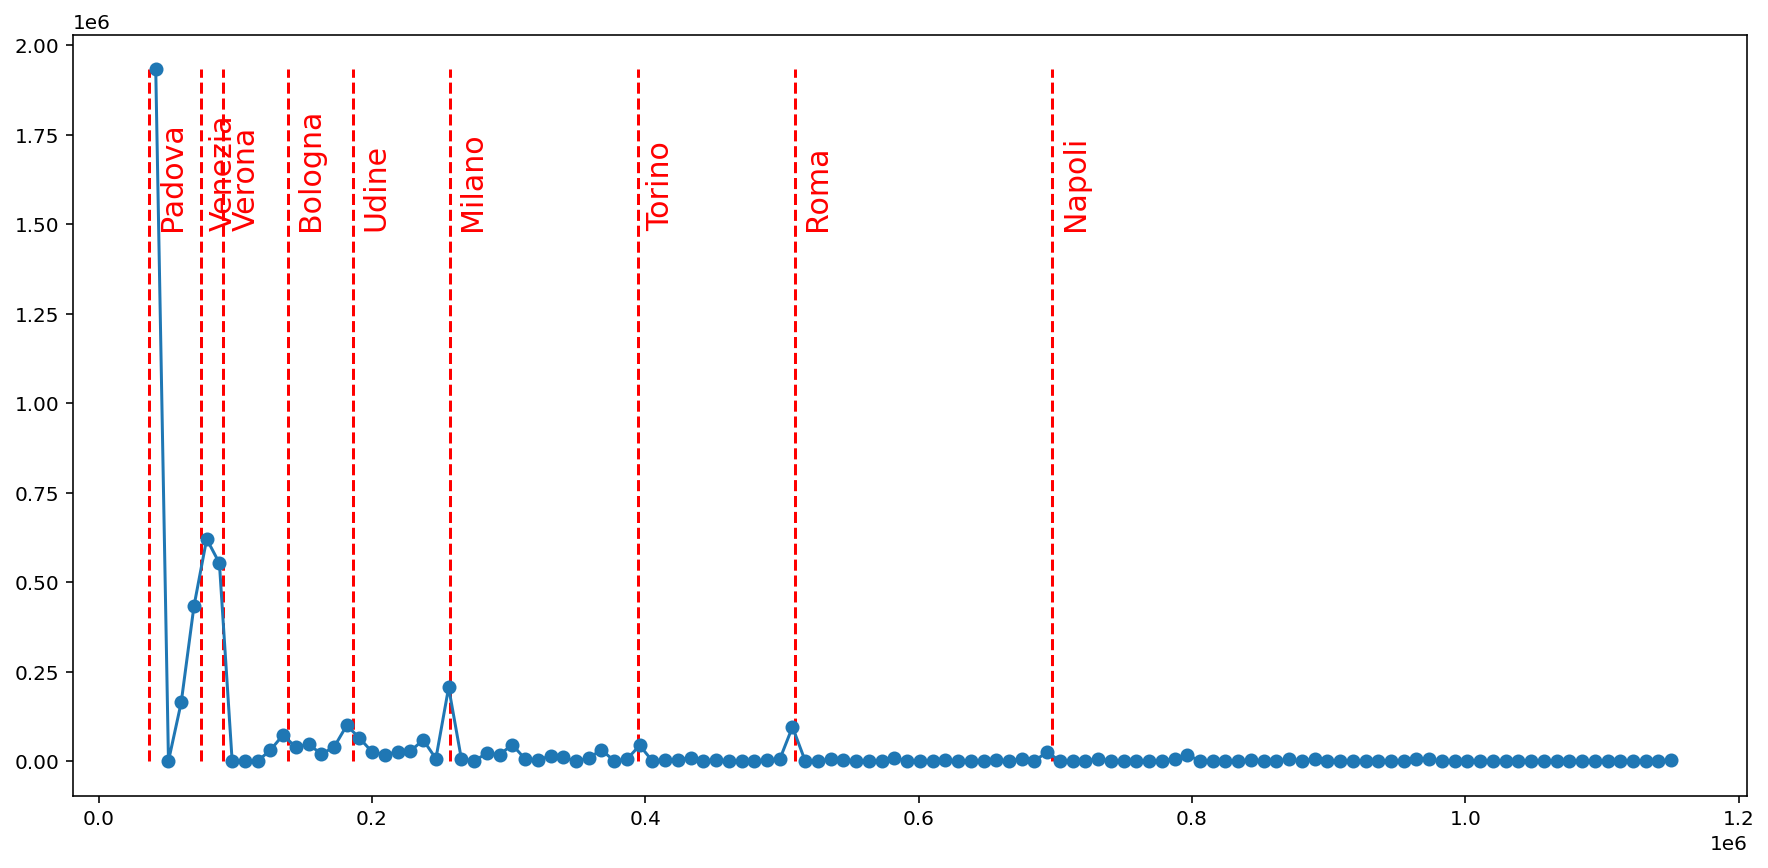

In [ ]:
#pos città is an int
#numb of bins not precise (not int) dependent on the number of bins


big=['Milano','Venezia','Roma','Napoli','Bologna','Torino','Udine','Verona','Padova']
cod_big=[]
for i in big:
    cod_big.append(cod_prov[cod_prov.PROVINCIA==i].COD_PRO.values[0]) #cod prov big

plt.figure(figsize=(15,7))
for i in range(len(big)):
    plt.vlines(prov_to_dist(cod_big[i]),min(f_bins),max(f_bins),color='r',linestyles='dashed') #discorso sui bins e città big
    plt.text(prov_to_dist(cod_big[i])+6e3,1.5E6,big[i],fontsize=15,color='r',rotation=90)

plt.plot(bins,f_bins,'-o');

[ 0.03354303 -0.06249858]


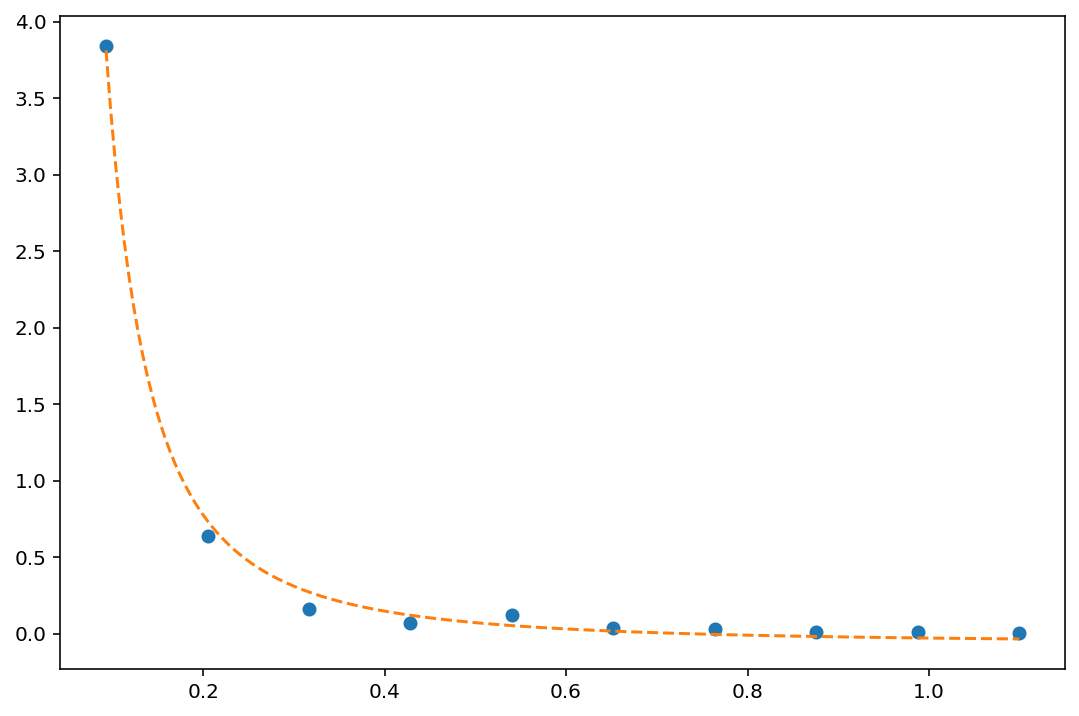

In [ ]:
from scipy import optimize
def f(x,A,B):
    return A/x**2+B

nbins=10
bins, f_bins = distribution(nbins,dud)
bins/=1e6
f_bins=np.array(f_bins)/1e6

max_params, params_covariance = optimize.curve_fit(f, bins, f_bins, p0=[1e6, 1e5])

#plot well the distr
x=np.linspace(np.min(bins),np.max(bins),200)
plt.figure(figsize=(9,6))
plt.plot(bins,f_bins,'o') #real measures
plt.plot(x,f(x,max_params[0],max_params[1]),'--') #syntetic data
print(max_params)

                PROVINCIA      VALUE
0                  Torino  2269120.0
1                Vercelli   172307.0
2                  Novara   369595.0
3                   Cuneo   588559.0
4                    Asti   215884.0
5             Alessandria   424174.0
6                  Biella   177067.0
7    Verbano-Cusio-Ossola   159159.0
8           Valle d'Aosta   126202.0
9                 Imperia   214305.0
10                 Savona   277810.0
11                 Genova   844957.0
12              La Spezia   219909.0
13                 Varese   890528.0
14                   Como   599301.0
15                Sondrio   181403.0
16                 Milano  3234658.0
17                Bergamo  1111035.0
18                Brescia  1262402.0
19                  Pavia   545810.0
20                Cremona   358512.0
21                Mantova   411762.0
22                  Lecco   339384.0
23                   Lodi   229765.0
24  Monza e della Brianza   871698.0
25        Bolzano / Bozen   527750.0
2

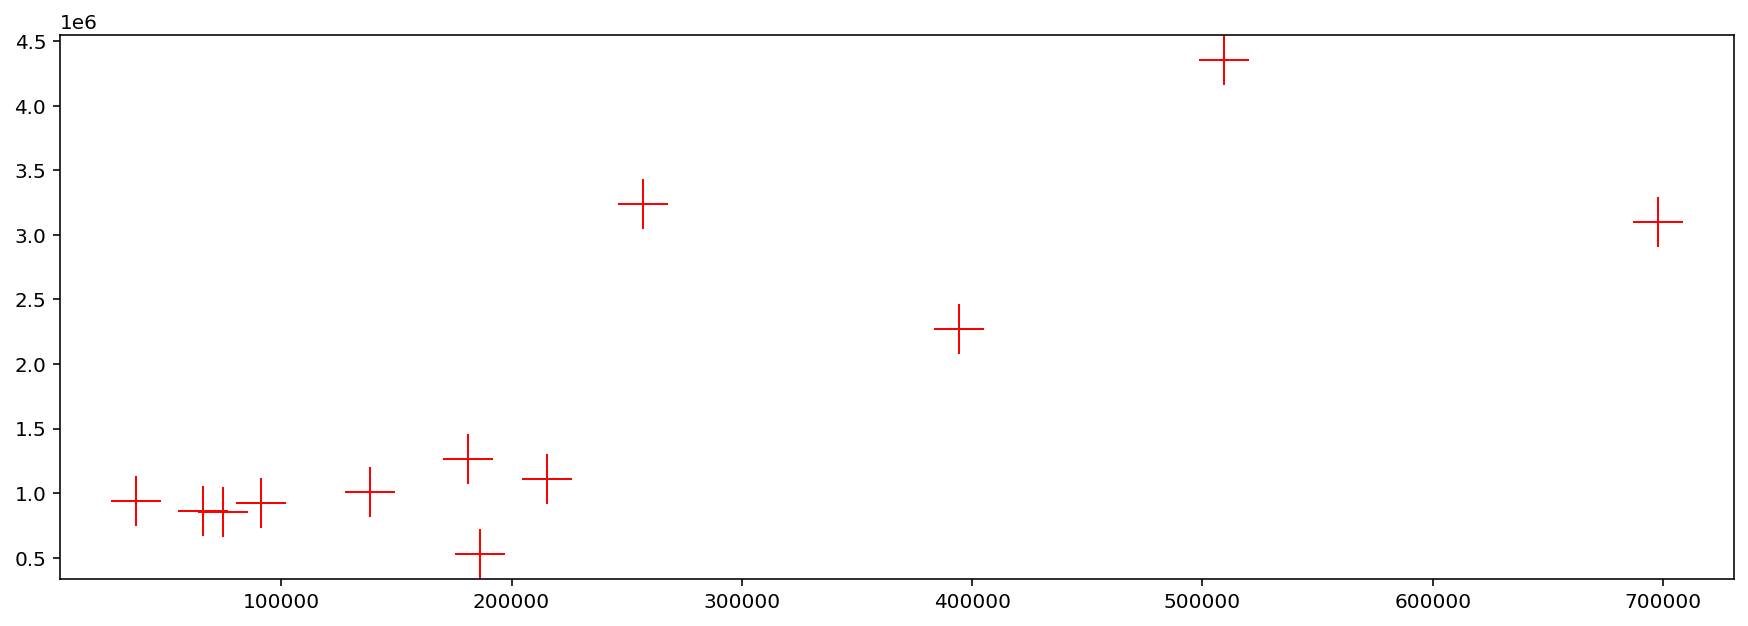

In [ ]:
# Getting DataFrame for codici_istat_provincia.csv
file_name="data/codici_istat_provincia.csv"
data_cip=pd.read_csv(file_name,sep=",",header=0,quoting=3,escapechar="\"",encoding="latin-1")
codist_prov=pd.DataFrame(data_cip)
codist_prov.head()


filename="data/abitanti2.txt"
abitanti = pd.read_csv(filename, header=None,quoting=2,encoding="latin-1")
abitanti = pd.DataFrame(abitanti[0].str.split('\t' ,n=1).tolist())
abitanti.columns = ["PROVINCIA", "VALUE"]
abitanti['VALUE'] = abitanti['VALUE'].apply(pd.to_numeric).sort_values(ascending=False)

print(abitanti[:30])

abitanti=abitanti.merge(codist_prov, on="PROVINCIA")
distances.columns=["COD_PRO","Destinazione","Total_Mete"]
abitanti=abitanti.merge(distances, on="COD_PRO")[["VALUE","Total_Mete", "COD_PRO", "PROVINCIA"]]


big=['Milano','Venezia','Roma','Napoli','Bologna','Torino','Udine','Verona','Padova', "Bergamo", "Brescia", "Vicenza"]
dist_big=[]
ab_big=[]
names_big=[]
for i in big:
    dist_big.append(abitanti[abitanti.PROVINCIA==i].Total_Mete.values[0]) #cod prov big
    ab_big.append(int(abitanti[abitanti.PROVINCIA==i].VALUE.values[0]))
    names_big.append(abitanti[abitanti.PROVINCIA==i].PROVINCIA.values[0])


print(cod_big,ab_big, "\n", names_big)

plt.figure(figsize=(15,5))
plt.plot(dist_big, ab_big, "r+", ms=25);

In [ ]:
#numb and freq and i want the histogram. Problem: plotlib needs one a vector of data
def distribution(N,df): #nmb of intervals adn df=data
    dist=df.DISTANCES.values
    freq=df.VISITORS.values #freq=visitors

    bins=np.linspace(np.min(dist),np.max(dist),N+1) #in N parts

    f_bins=[]
    for i in range(len(bins)-1):
      
        f=np.sum(freq[dist<=bins[i+1]])
        f-=np.sum(freq[dist<bins[i]])
        f_bins.append(f)

    bins=(bins[1:]+bins[:-1])*0.5

    return bins, f_bins